In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Creando Datos Sinteticos para el Ejemplo 

(1, 1000)


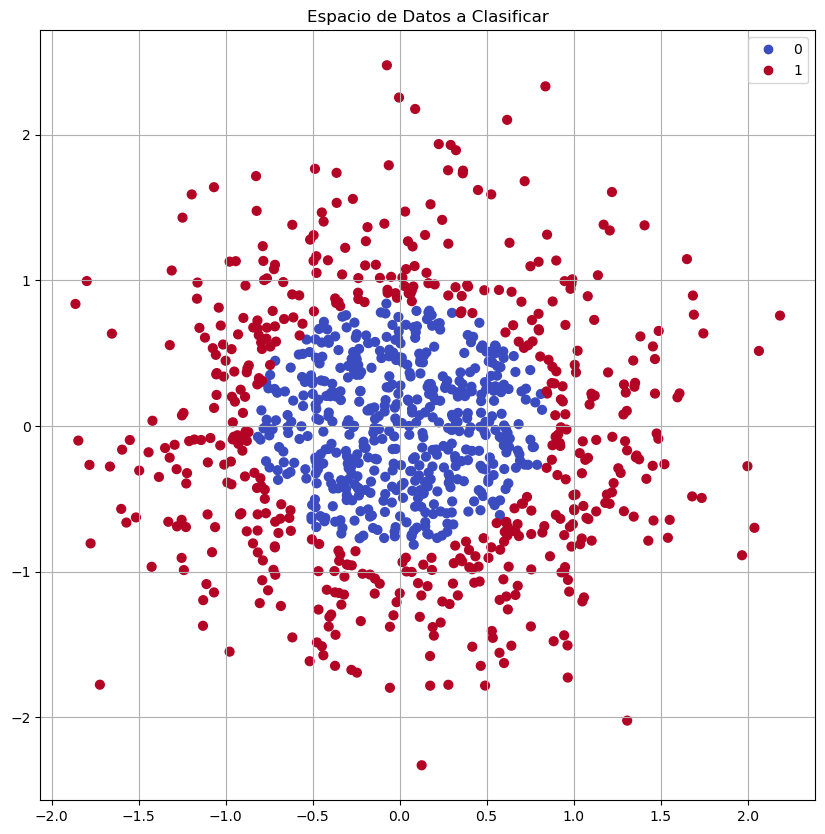

In [2]:
Samples=1000

X,Y = make_gaussian_quantiles(mean=None,cov=0.5, n_samples=Samples,n_features=2,n_classes=2,shuffle=True,random_state=83)
Y=Y[:,np.newaxis]
y=Y.T
print(y.shape)

plt.figure(figsize=(10,10))
scatter=plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.coolwarm)
plt.legend(*scatter.legend_elements())
plt.title('Espacio de Datos a Clasificar')
plt.grid()




### Definiedo las Funciones de Activación 

In [3]:
def sigmoid(x,derivar=False):
    if derivar:
        return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
        return (1/(1+np.exp(-x)))
    
def relu(x,derivar=False):
    y=x.copy() ### Entender por que se tuvo que hacer una copia???
    if derivar:
        y[x<=0]=0
        y[x>0]=1
        return y
    else:
        y=np.maximum(0,x)
        return y
    

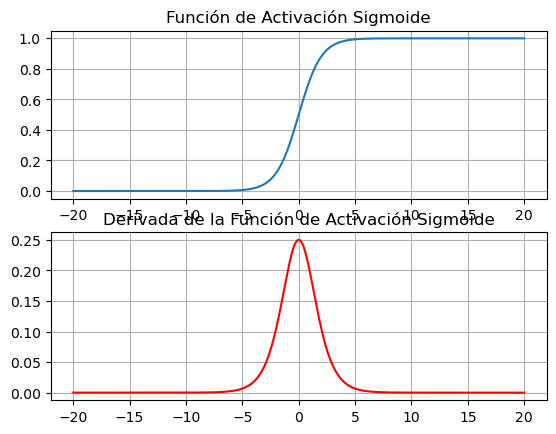

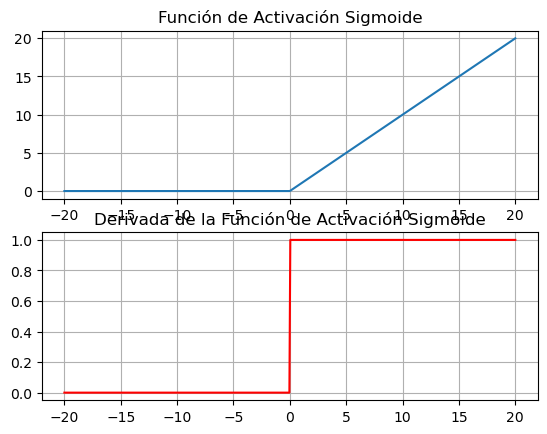

In [4]:
x=np.linspace(-20,20,500)
sigx=sigmoid(x,derivar=False)
dsigx=sigmoid(x,derivar=True)
relux=relu(x,derivar=False)
drelux=relu(x,derivar=True)
fig, ax = plt.subplots(2)
ax[0].plot(x,sigx)
ax[0].grid()
ax[0].set_title('Función de Activación Sigmoide')
ax[1].plot(x,dsigx,color='r')
ax[1].grid()
ax[1].set_title('Derivada de la Función de Activación Sigmoide')
plt.show()

fig, ax = plt.subplots(2)
ax[0].plot(x,relux)
ax[0].grid()
ax[0].set_title('Función de Activación Sigmoide')
ax[1].plot(x,drelux,color='r')
ax[1].grid()
ax[1].set_title('Derivada de la Función de Activación Sigmoide')
plt.show()

## Definiendo la Función de Perdida 

### Formula Matematica
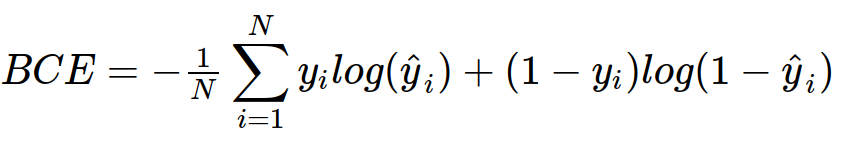

In [5]:
def binarycrossentropy(y,y_hat,derivar=False):
    epsm=np.finfo(float).eps
    if derivar:
        N=max(y.shape)
        return (1/N)*((1-y)/(1-y_hat+epsm)-y/(y_hat+epsm))
    else:
         return -np.mean(y*np.log(y_hat+epsm)+(1-y)*np.log(1-y_hat+epsm))


## Definir Nuestra Red Neuronal 

In [6]:

def iniciarRed(layer_dim,seed):
    parametros={}
    num_cap=len(layer_dim)
    np.random.seed(seed)
    for cap in range(0,num_cap-1):
        parametros['W'+str(cap+1)]=np.random.rand(layer_dim[cap+1],layer_dim[cap])*2-1
        parametros['b'+str(cap+1)]=np.random.rand(layer_dim[cap+1],1)*2-1
    return parametros


### Arancando con la Red Neuronal 

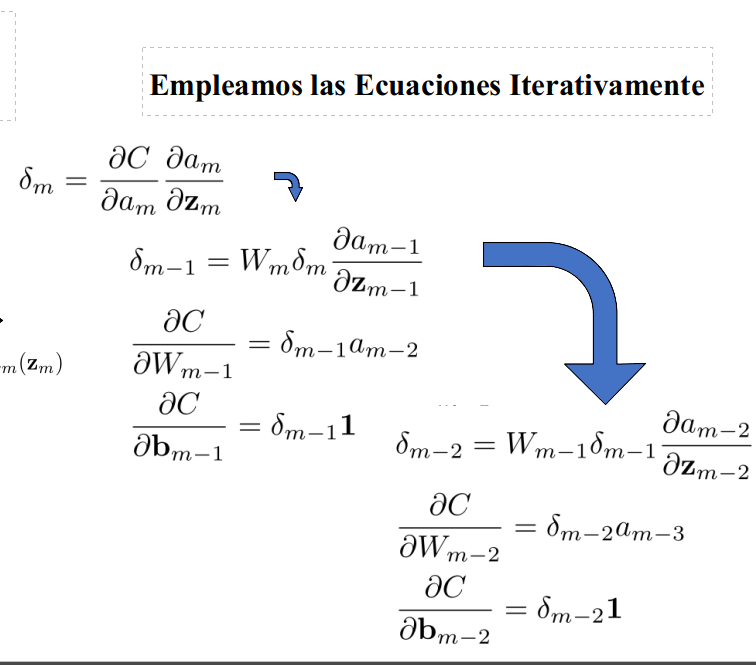

In [7]:
layer_dim =[2,4,3,1]

RED=iniciarRed(layer_dim=layer_dim,seed=10)

LearningRate=0.01

lossv=[]
epochs=100000

for i  in range(0,epochs):
    ### Iniciamos la Propagación hacia Adelante
    RED['A0']=X.T ## Definir la Capa de Entrada 
    RED['Z1']=RED['W1']@RED['A0']+RED['b1'] ## Calculamos la combinación lineal de la primera capa
    RED['A1']=relu(RED['Z1']) ## Calculamos la salida de la primera capa 
    RED['Z2']=RED['W2']@RED['A1']+RED['b2'] ## Calculamos la combinación lineal de la segunda capa
    RED['A2']=relu(RED['Z2']) ## Calculamos la salida de la primera capa 
    RED['Z3']=RED['W3']@RED['A2']+RED['b3'] ## Calculamos la combinación lineal de la Capa de Salida
    RED['A3']=sigmoid(RED['Z3']) ## Calculamos la salida de la primera capa 
    y_hat=RED['A3'] ## Calculamos la salida de nuestro predictor 
    loss=binarycrossentropy(y,y_hat)
    lossd=binarycrossentropy(y,y_hat,derivar=True)
    ### Iniciamos la Propagación hacia Atras.
    ### Se Calculan los Gradientes de la Capa de Salida m=3
    RED['delta3']=lossd*sigmoid(RED['Z3'],derivar=True)
    RED['GradW3']=RED['delta3']@RED['A2'].T
    RED['Gradb3']=np.sum(RED['delta3'],axis=1)
    RED['Gradb3']=RED['Gradb3'][:,np.newaxis]
    ### Se Calculan los Gradientes de la Capa 2 o m-1
    RED['delta2']=RED['W3'].T@RED['delta3']*relu(RED['Z2'],derivar=True) 
    RED['GradW2']=RED['delta2']@RED['A1'].T 
    RED['Gradb2']=np.sum(RED['delta2'],axis=1)
    RED['Gradb2']=RED['Gradb2'][:,np.newaxis]
    ### Se Calculan los Gradientes de la Capa 1 o m-2
    RED['delta1']=RED['W2'].T@RED['delta2']*relu(RED['Z1'],derivar=True) 
    RED['GradW1']=RED['delta1']@RED['A0'].T 
    RED['Gradb1']=np.sum(RED['delta1'],axis=1)
    RED['Gradb1']=RED['Gradb1'][:,np.newaxis]
    ### Se Calcula los Valores de los pesos en la siguiente iteración  Mediante el algoritmo del descenso por gradiente. 
    RED['W1'] += -LearningRate*RED['GradW1']
    RED['W2'] += -LearningRate*RED['GradW2']
    RED['W3'] += -LearningRate*RED['GradW3']
    RED['b1'] += -LearningRate*RED['Gradb1']
    RED['b2'] += -LearningRate*RED['Gradb2']
    RED['b3'] += -LearningRate*RED['Gradb3']
    if i % 1000 == 0:
        print('La Función de Perdida para la epoca %i es : %f' %(i,loss),end="\r")
    lossv.append(loss)

Text(0, 0.5, 'Función de Costo')

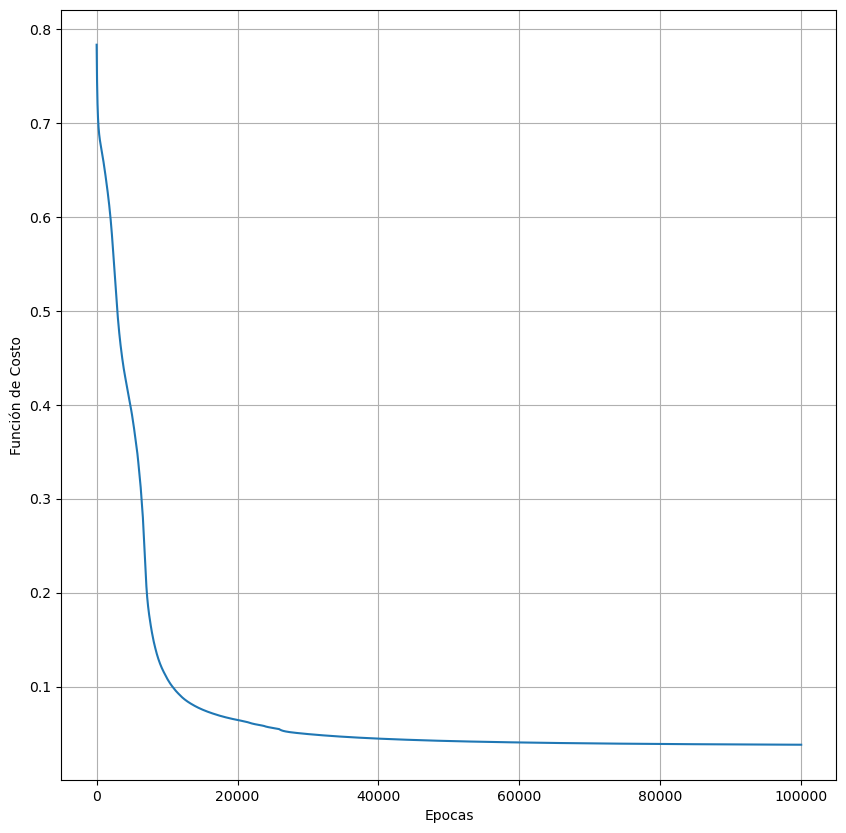

In [8]:
plt.figure(figsize=(10,10))
plt.plot(lossv)
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Función de Costo')

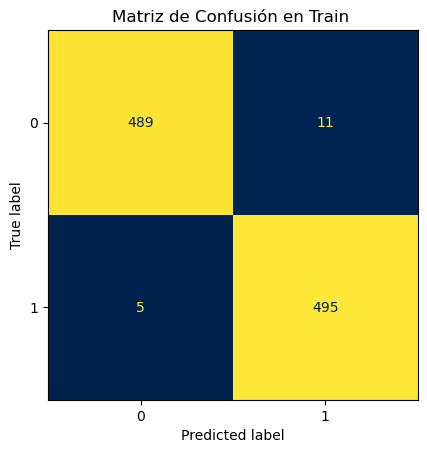

In [9]:
Umbral=0.5
yp=np.where(y_hat>Umbral,1,0)
cm = confusion_matrix(y[0],yp[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d',cmap='cividis', colorbar=False)
plt.title('Matriz de Confusión en Train ')
plt.show()